In [6]:
#load libraries and inspect data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_csv(r'C:\Users\Administrator\cleaned_products.csv')

In [12]:
print(df.columns)
print(df[['Price', 'Rating', 'Discount', 'Sales']].describe())

Index(['ProductID', 'ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'DateAdded', 'City'],
      dtype='object')
            Price       Rating     Discount        Sales
count  1000.00000  1000.000000  1000.000000  1000.000000
mean    253.77551     3.025600     0.251640  1011.037000
std     141.40362     1.151004     0.146455   582.113466
min      10.11000     1.000000     0.000000     0.000000
25%     133.09250     2.100000     0.130000   502.000000
50%     251.31000     3.100000     0.250000   998.000000
75%     375.82750     4.000000     0.380000  1540.000000
max     499.74000     5.000000     0.500000  1997.000000


In [13]:
#check and prepare data
# Show basic structure
print(df[['Price', 'Rating', 'Discount', 'Sales']].info())

# Drop rows with missing values (if any)
df = df[['Price', 'Rating', 'Discount', 'Sales']].dropna()

# Check correlations (optional but helpful)
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1000 non-null   float64
 1   Rating    1000 non-null   float64
 2   Discount  1000 non-null   float64
 3   Sales     1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None
             Price    Rating  Discount     Sales
Price     1.000000 -0.006462 -0.045133  0.029076
Rating   -0.006462  1.000000  0.024495  0.008475
Discount -0.045133  0.024495  1.000000  0.027413
Sales     0.029076  0.008475  0.027413  1.000000


In [14]:
#split the data(train/test)
from sklearn.model_selection import train_test_split

X = df[['Price', 'Rating', 'Discount']]  # Features
y = df['Sales']                          # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 353196.01
R² Score: -0.02


In [17]:
#interpret coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)

    Feature  Coefficient
0     Price     0.271820
1    Rating     1.670828
2  Discount   132.741928


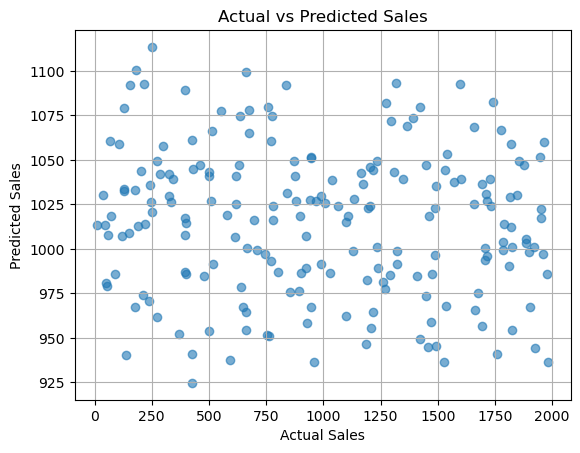

In [18]:
#visual predicted vs actual
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()